# Lab 5

### Imports

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import (
    label_binarize,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
    MinMaxScaler,
    PolynomialFeatures
)
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    auc,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

# Datasets
from sklearn.datasets import load_iris

## Automobile dataset (Regression)

### Loading the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df_reg = pd.read_csv(url, header=None)
df_reg

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
col_names = [
    "symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
    "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
    "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", 
    "peak-rpm","city-mpg","highway-mpg","price"
]
df_reg.columns = col_names

### Removing ?

In [4]:
df_reg = df_reg.replace('?', np.nan)
df_reg

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Info, Describe and hist plots

In [5]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Converting the datatypes to appropriate types

In [6]:
float_cols = [
    "normalized-losses", "wheel-base", "length", "width", "height",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "price"
]
df_reg[float_cols] = df_reg[float_cols].astype(float)

int_cols = ["symboling", "curb-weight", "engine-size", "city-mpg", "highway-mpg"]
df_reg[int_cols] = df_reg[int_cols].astype(int)

cat_cols = [
    "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
    "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"
]
df_reg[cat_cols] = df_reg[cat_cols].astype("object")

df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df_reg.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df_reg.describe(include="object")

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


### Removing null and Duplicates

In [9]:
df_reg.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df_reg = df_reg.drop_duplicates()
df_reg.shape

(205, 26)

In [11]:
cols_with_mean = ["normalized-losses", "stroke", "bore", "horsepower"]

for col in cols_with_mean:
    df_reg[col] = pd.to_numeric(df_reg[col], errors='coerce').astype('float64')
    df_reg.fillna({col:df_reg[col].mean()}, inplace=True)

df_reg[cols_with_mean].isnull().sum()

normalized-losses    0
stroke               0
bore                 0
horsepower           0
dtype: int64

In [12]:
df_reg["price"] = pd.to_numeric(df_reg["price"], errors='coerce')
df_reg.dropna(subset=["price"], inplace=True)
df_reg.shape

(201, 26)

In [13]:
df_reg.fillna({"num-of-doors": df_reg["num-of-doors"].mode()[0]}, inplace=True)
df_reg["num-of-doors"].isnull().sum()

np.int64(0)

In [14]:
df_reg["peak-rpm"] = pd.to_numeric(df_reg["peak-rpm"], errors="coerce").astype('float64')
df_reg.fillna({"peak-rpm":df_reg["peak-rpm"].median()}, inplace=True)
df_reg["peak-rpm"].isnull().sum()

np.int64(0)

In [15]:
df_reg.isnull().sum().sum()

np.int64(0)

### Hist and Box plots

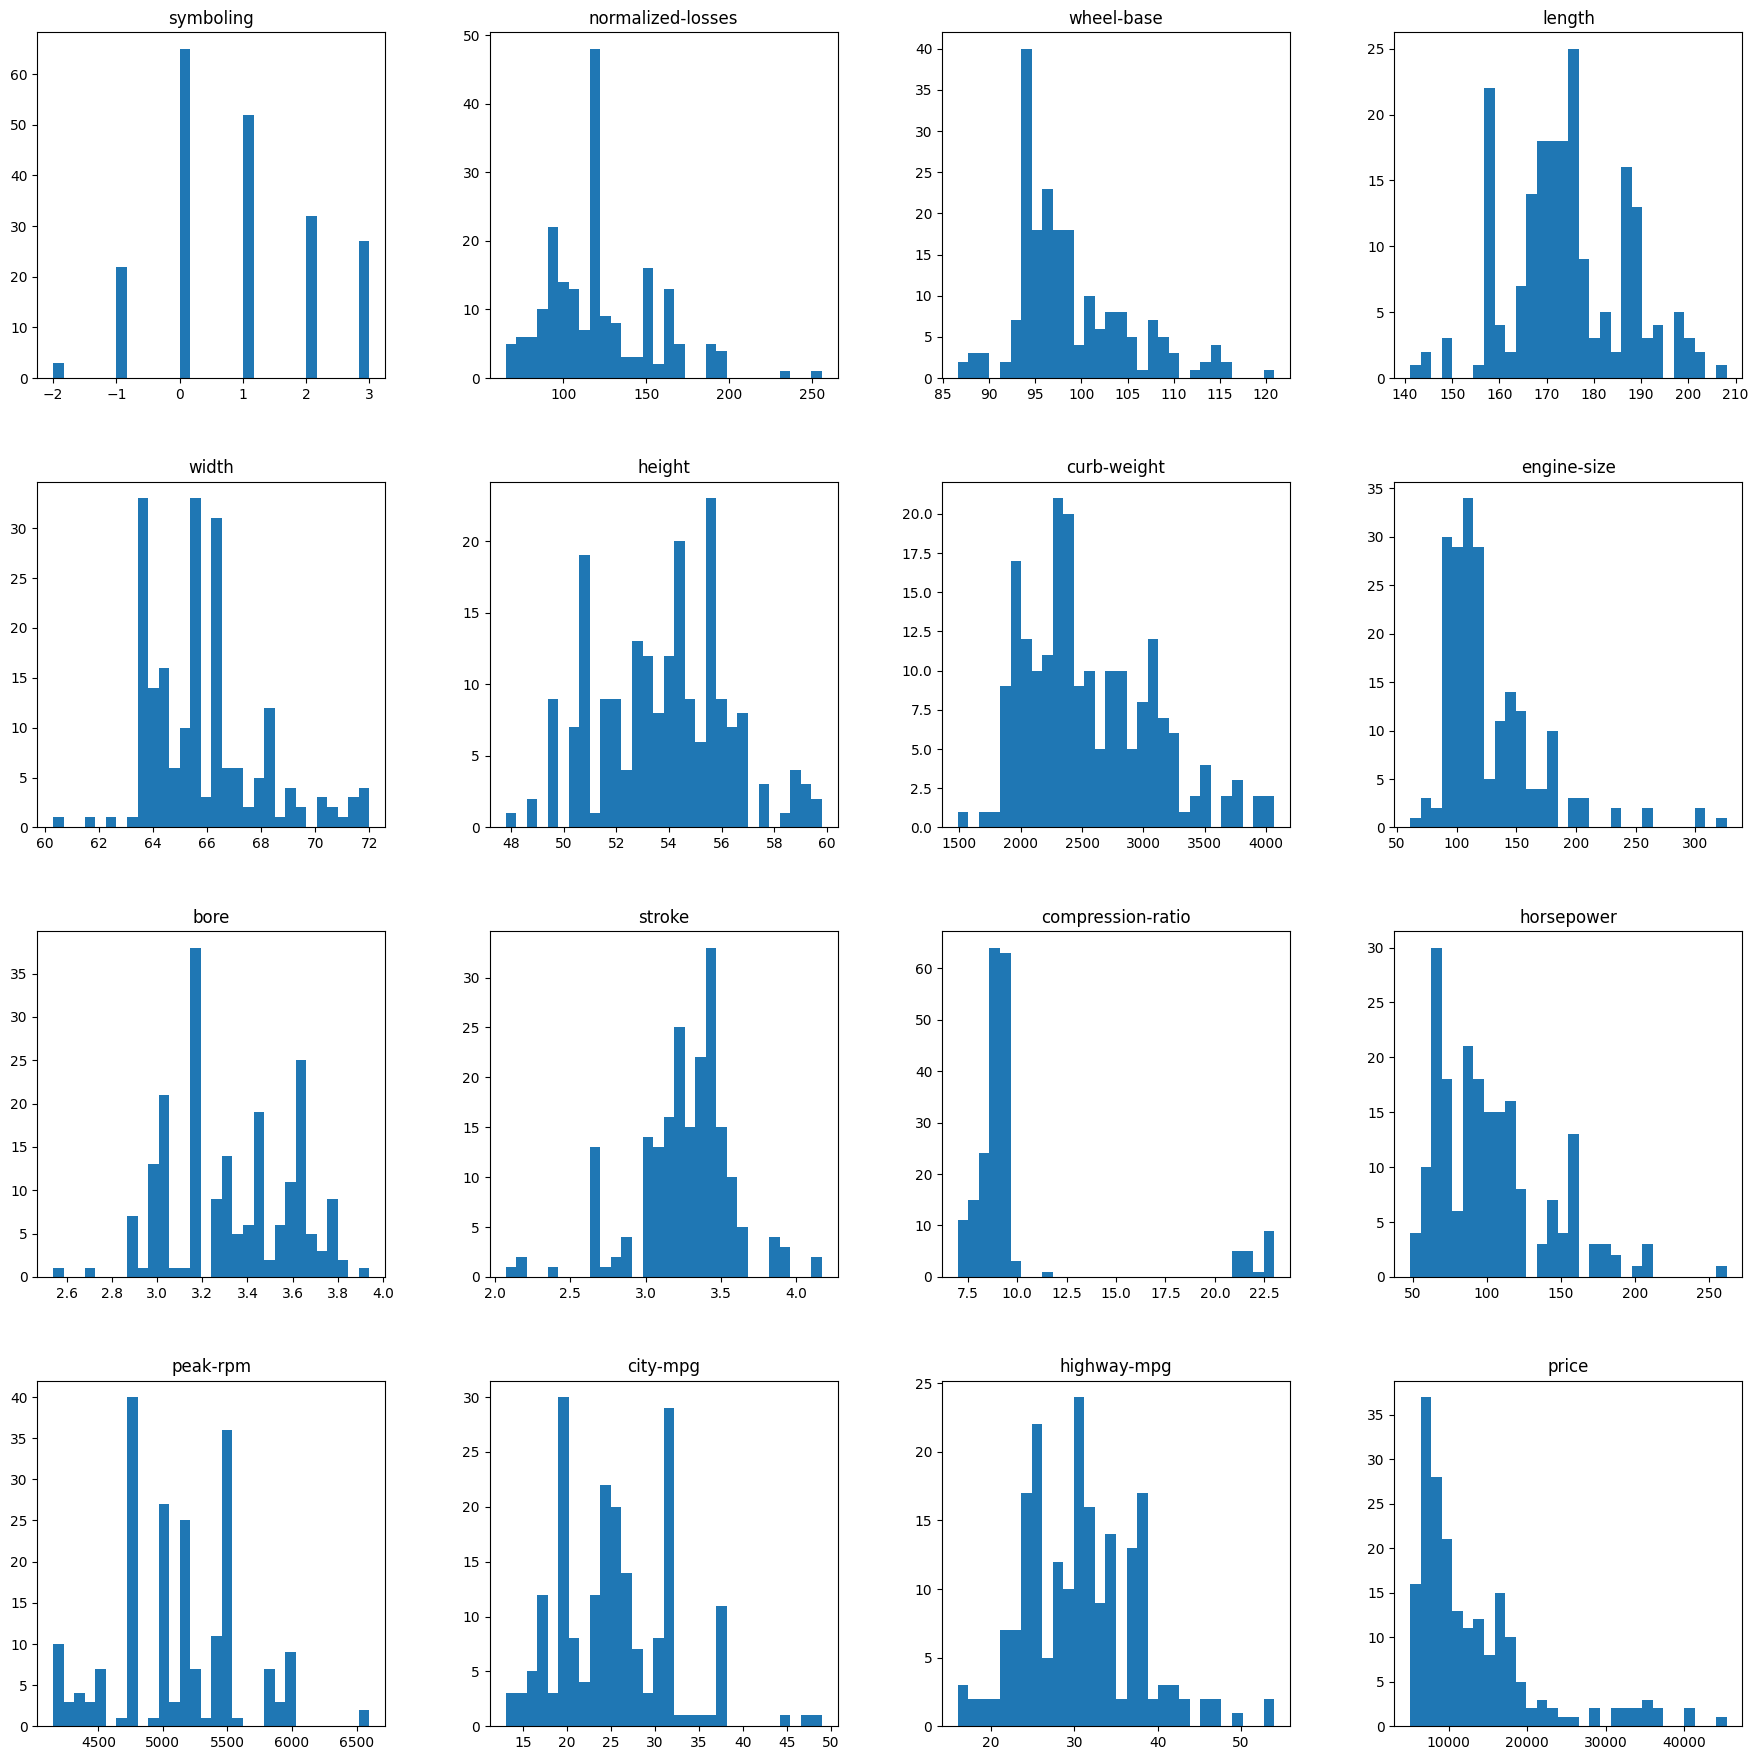

In [16]:
df_reg.hist(bins=30, grid=False, figsize=(22,22))
plt.show()

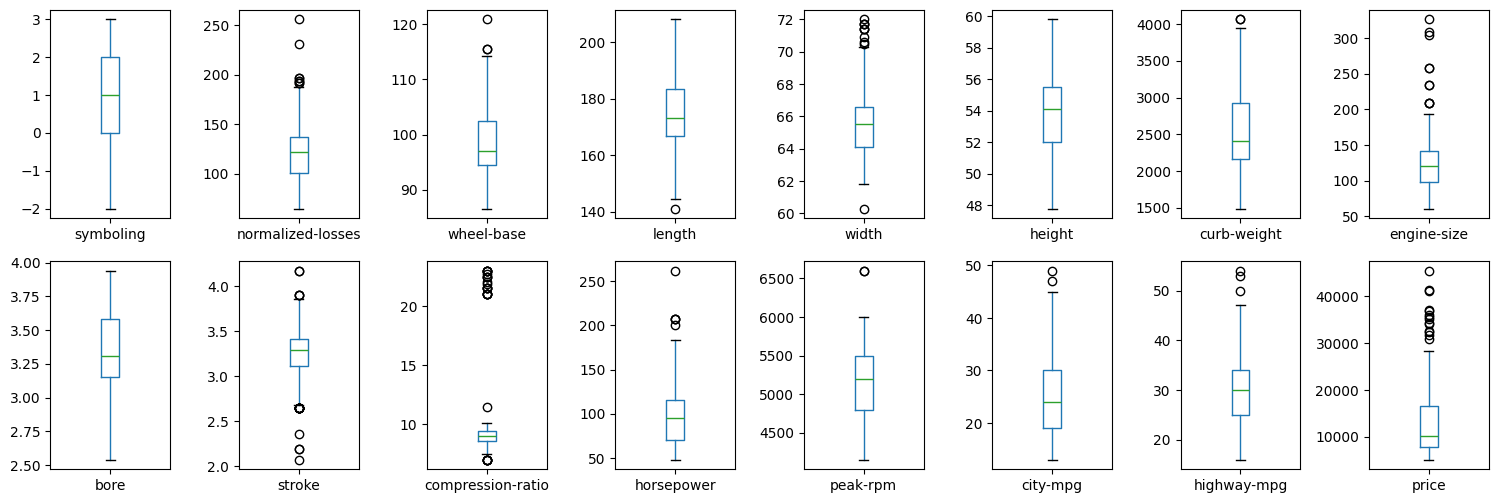

In [17]:
import matplotlib.pyplot as plt

num_cols = [col for col in df_reg.columns if df_reg[col].dtype != "object"]

fig, axes = plt.subplots(10, 8, figsize=(15,25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df_reg[[col]].boxplot(ax=axes[i], grid=False)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Corelation Heatmap

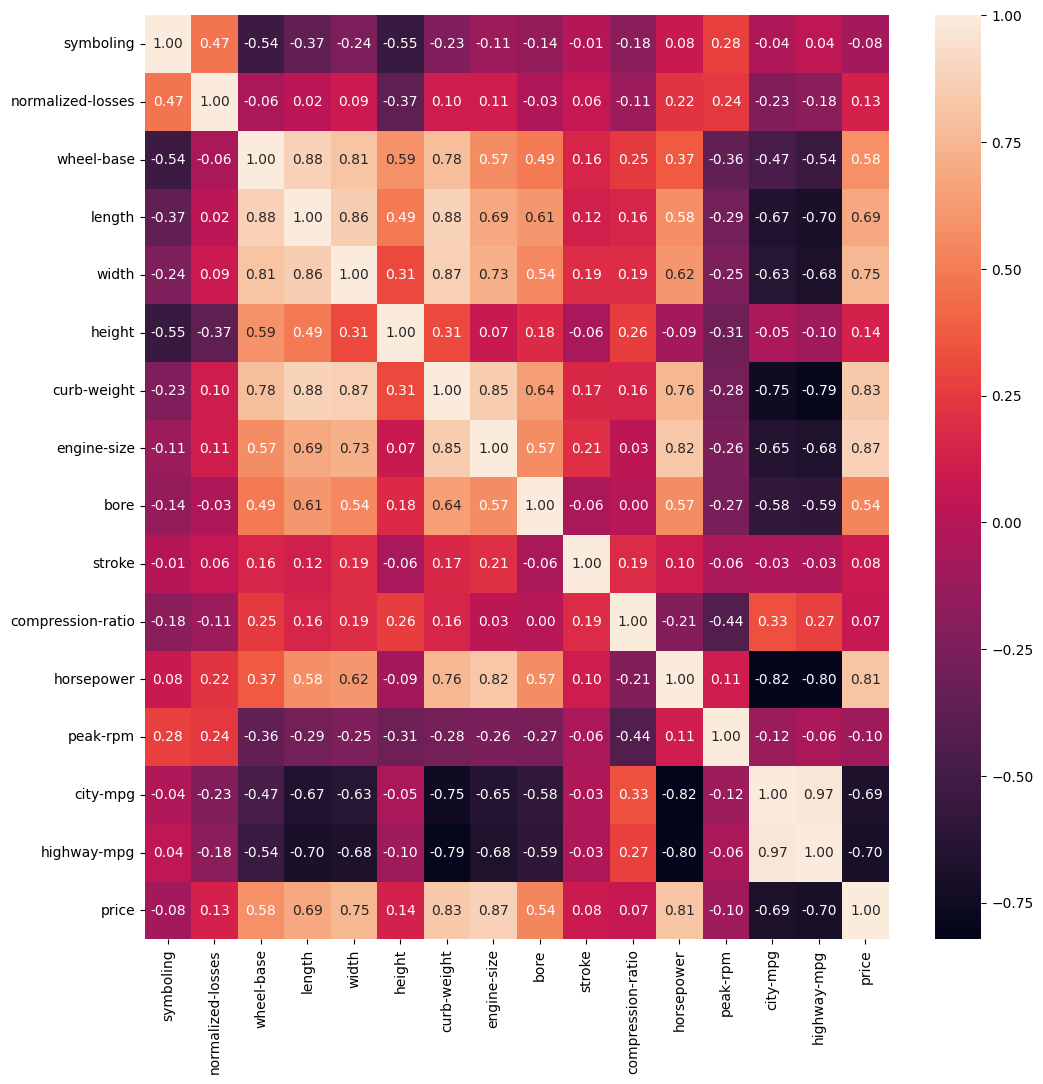

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df_reg.corr(numeric_only=True), annot=True, fmt='.2f') 
plt.show()

### Encoding Catagorical Cols and Scaling numerical Cols

In [19]:
# 0) Copy
df = df_reg.copy()

In [20]:
# 1) Normalize string columns
str_cols = ['make','fuel-type','aspiration','num-of-doors','body-style', 'drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for c in str_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower()

In [21]:
# 2) Map doors & cylinders
doors_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5}
cyl_map   = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

if 'num-of-doors' in df:
    df['num-of-doors'] = df['num-of-doors'].map(doors_map).fillna(4).astype(int)   # fallback = 4
if 'num-of-cylinders' in df:
    df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_map).fillna(4).astype(int)

In [22]:
# 3) Binary columns
bin_maps = {
    'fuel-type': {'gas': 0, 'diesel': 1},
    'aspiration': {'std': 0, 'turbo': 1},
    'engine-location': {'front': 0, 'rear': 1}
}
for col, mapping in bin_maps.items():
    if col in df:
        df[col] = df[col].map(mapping).fillna(0).astype(int)

In [23]:
# 4) Rare makes grouped as "other"
if 'make' in df:
    rare_makes = df['make'].value_counts()[lambda x: x < 3].index
    df.loc[df['make'].isin(rare_makes), 'make'] = 'other'

In [24]:
# 5) One-hot encode nominal
nominal_cols = [c for c in ['make','body-style','drive-wheels','engine-type','fuel-system'] if c in df]
df_nom = pd.get_dummies(df[nominal_cols], drop_first=True).astype('int32')

In [25]:
# 6) Numeric columns (exclude target)
numeric_cols = df.select_dtypes(include='number').columns.drop('price', errors='ignore')

In [26]:
# 7) Robust scale numeric
scaler = RobustScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

In [27]:
# 8) Final dataset
df_reg_encoded = pd.concat([df_num, df_nom, df[['price']]], axis=1)

In [28]:
print("Final shape:", df_reg_encoded.shape)
print("Non-numeric cols left:", df_reg_encoded.select_dtypes('object').columns.tolist())

Final shape: (201, 58)
Non-numeric cols left: []


In [29]:
df_reg_encoded.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_other', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
      

In [30]:
df_reg.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Test Train Split

In [31]:
X_reg = df_reg_encoded.drop(columns=['price'])
y_reg = df_reg_encoded['price']

In [32]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2)
X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((160, 57), (160,), (41, 57), (41,))

### Traning the models and printing the metrics

In [33]:
def print_and_log_regression_metrics(name, yt, yp, df, train_or_test=""):
    # Metrics
    mae = mean_absolute_error(yt, yp)
    mse = mean_squared_error(yt, yp)
    rmse = np.sqrt(mse)
    r2 = r2_score(yt, yp)

    # Print report
    print(f"=== {name} {train_or_test}: Regression Report ===")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")

    # Plot: Predicted vs Actual
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=yt, y=yp, alpha=0.7)
    plt.plot([yt.min(), yt.max()], [yt.min(), yt.max()], 'r--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} {train_or_test}: Predicted vs Actual")
    plt.grid(True)
    plt.show()

    # Append to DataFrame
    metrics_df = pd.DataFrame([{
        "Model": name,
        "y_true": yt,
        "y_predicted": yp,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }])
    return pd.concat([df, metrics_df], ignore_index=True)

In [34]:
models_reg = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=10),
    "Lasso": Lasso(random_state=10),
    "ElasticNet": ElasticNet(random_state=10, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=10),
    "Random Forest": RandomForestRegressor(random_state=10),
}

In [35]:
test_metrics_reg = pd.DataFrame(columns=["Model", "y_true", "y_predicted", "MAE", "MSE", "RMSE", "R2"])

=== Linear Regression Test: Regression Report ===
MAE:  2194.6721
MSE:  10835582.4565
RMSE: 3291.7446
R2:   0.8316


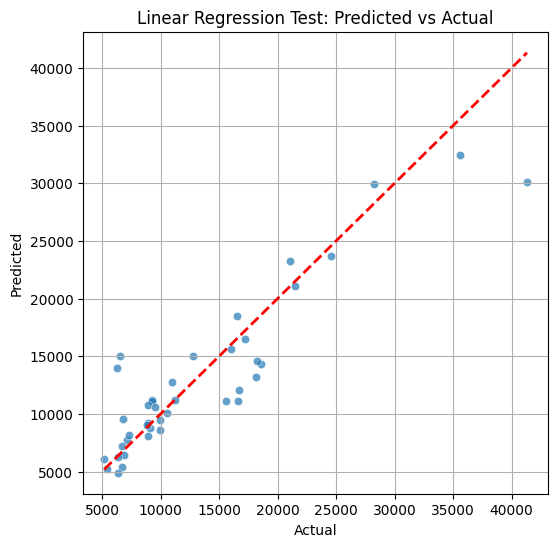

=== Ridge Test: Regression Report ===
MAE:  1746.6955
MSE:  7335808.3195
RMSE: 2708.4697
R2:   0.8860


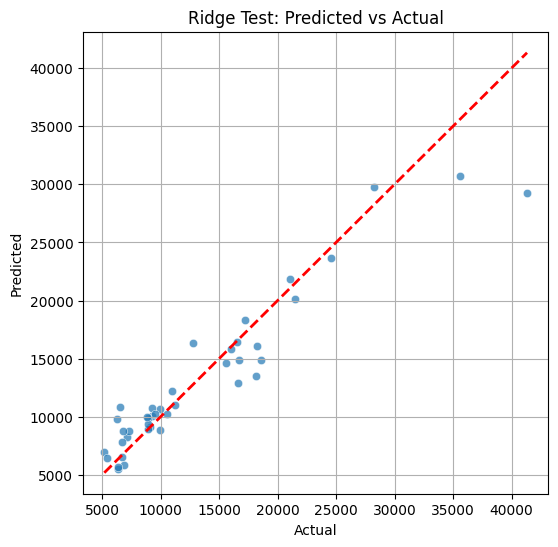

=== Lasso Test: Regression Report ===
MAE:  1914.3626
MSE:  8079458.7282
RMSE: 2842.4389
R2:   0.8745


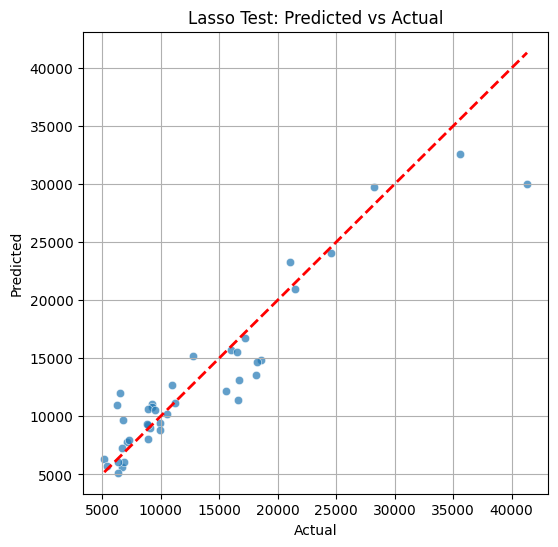

=== ElasticNet Test: Regression Report ===
MAE:  1903.3032
MSE:  11602785.0151
RMSE: 3406.2861
R2:   0.8197


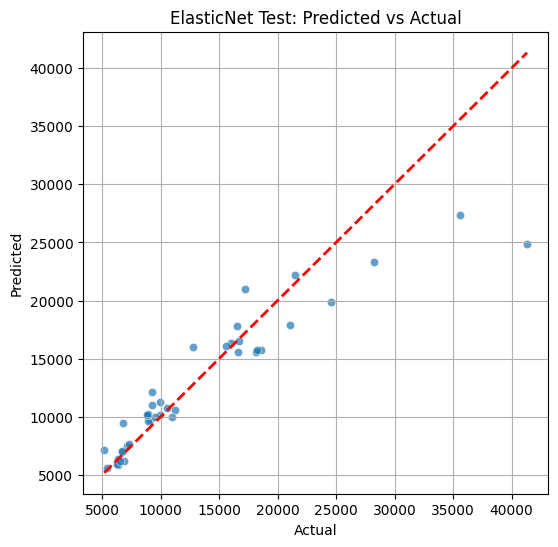

=== Decision Tree Test: Regression Report ===
MAE:  2136.6098
MSE:  10003295.2439
RMSE: 3162.7986
R2:   0.8446


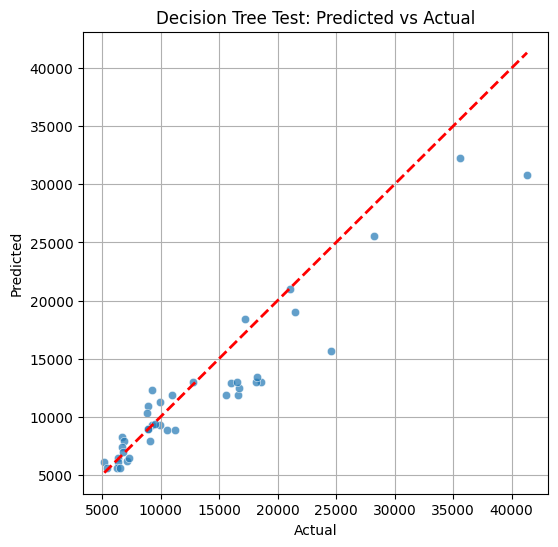

=== Random Forest Test: Regression Report ===
MAE:  1782.5183
MSE:  6426266.1488
RMSE: 2535.0081
R2:   0.9001


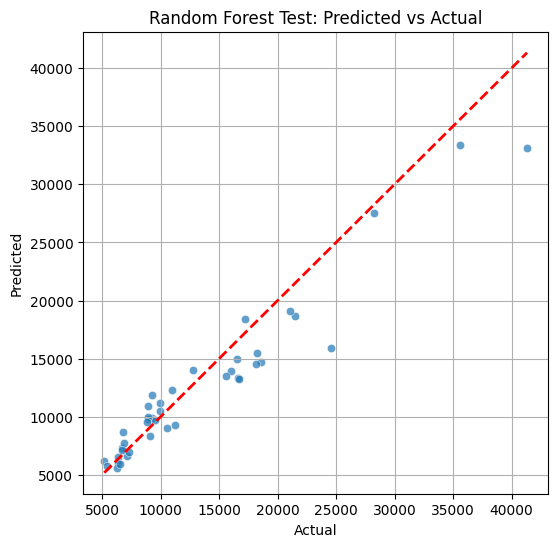

In [36]:
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    
    y_test_pred_reg = model.predict(X_test_reg)
    test_metrics_reg = print_and_log_regression_metrics(name, y_test_reg, y_test_pred_reg, test_metrics_reg, train_or_test='Test')

### Test metrics

In [37]:
test_metrics_reg[["Model", "MAE", "MSE", "RMSE", "R2"]]

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,2194.672105,1.083558e+07,3291.744592,0.831626
1,Ridge,1746.695505,7.335808e+06,2708.469738,0.886009
2,Lasso,1914.362555,8.079459e+06,2842.438870,0.874453
3,ElasticNet,1903.303176,1.160279e+07,3406.286103,0.819704
4,Decision Tree,2136.609756,1.000330e+07,3162.798641,0.844559
5,Random Forest,1782.518268,6.426266e+06,2535.008116,0.900142


## Classification (Iris flower)

### Loading the Dataset

In [38]:
iris = load_iris()
df_cla = pd.DataFrame(iris.data, columns=iris.feature_names)
df_cla['target'] = iris.target
df_cla

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Checking for null and removing duplicates

In [39]:
df_cla.isnull().sum().sum()

np.int64(0)

In [40]:
df_cla = df_cla.drop_duplicates()
df_cla.shape

(149, 5)

### Info and Describe

In [41]:
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [42]:
df_cla.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Hist and Box plots

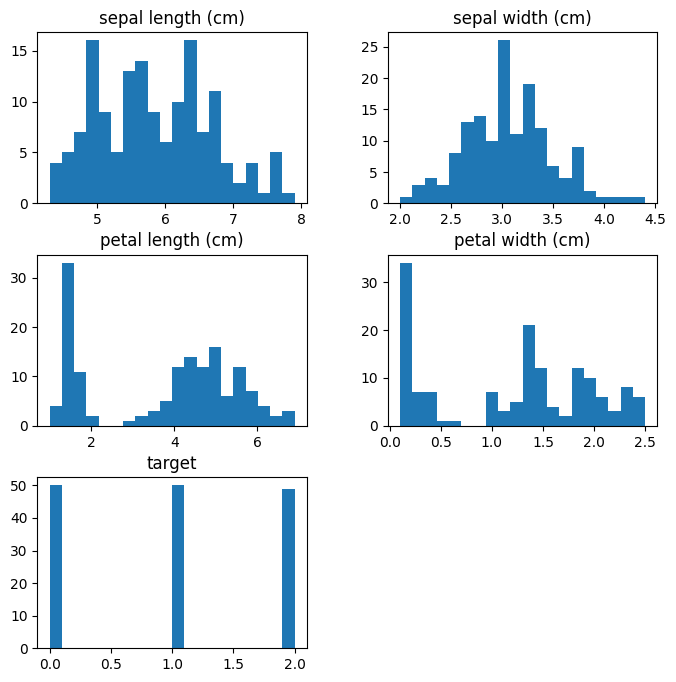

In [43]:
df_cla.hist(bins=20, figsize=(8,8), grid=False)
plt.show()

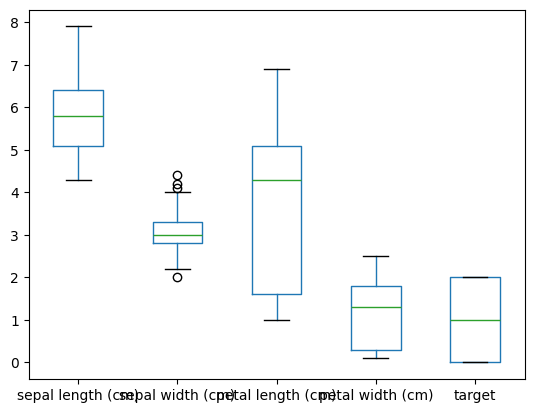

In [44]:
df_cla.boxplot(grid=False)
plt.show()

### Corelation Heatmap

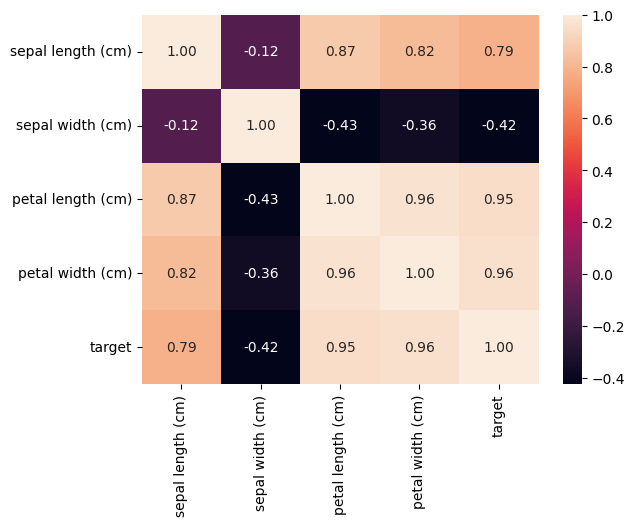

In [45]:
sns.heatmap(df_cla.corr(), annot=True, fmt='.2f') 
plt.show()

### Test Train Split

In [46]:
X_cla = df_cla.drop(columns=['target'])
y_cla = df_cla['target']

In [47]:
X_train_cla, X_test_cla, y_train_cla, y_test_cla = train_test_split(X_cla, y_cla, test_size=0.2)
X_train_cla.shape, y_train_cla.shape, X_test_cla.shape, y_test_cla.shape

((119, 4), (119,), (30, 4), (30,))

### Traning the models and printing the metrics

In [48]:
# function to plot auc-roc and confusion metrix and print classification report and other metrics and log them in df
def print_and_log_classification_metrics(name, yt, yp, yproba, df, train_or_test=""):
    # Basic metrics
    acc = accuracy_score(yt, yp)
    prec = precision_score(yt, yp, average='weighted')
    rec = recall_score(yt, yp, average='weighted')
    f1 = f1_score(yt, yp, average='weighted')

    # Handle ROC AUC for binary vs multiclass
    n_classes = len(np.unique(yt))
    if n_classes == 2:
        auc_score = roc_auc_score(yt, yproba[:, 1]) if yproba.ndim > 1 else roc_auc_score(yt, yproba)
    else:
        auc_score = roc_auc_score(yt, yproba, multi_class="ovr", average="weighted")

    # Print classification report
    print(f"=== {name} {train_or_test}: Classification Report ===")
    print(classification_report(yt, yp))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, "
          f"F1: {f1:.4f}, AUC: {auc_score:.4f}")

    # ROC Curve
    plt.figure(figsize=(8, 6))
    if n_classes == 2:
        fpr, tpr, _ = roc_curve(yt, yproba[:, 1])
        plt.plot(fpr, tpr, label=f"{name} {train_or_test} (AUC = {auc_score:.2f})", color='blue')
    else:
        classes = np.unique(yt)
        yt_bin = label_binarize(yt, classes=classes)
        for i, class_label in enumerate(classes):
            fpr, tpr, _ = roc_curve(yt_bin[:, i], yproba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.title(f'{name} {train_or_test} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(yt, yp)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} {train_or_test} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n\n")

    # Log metrics
    metrics_df = pd.DataFrame([{
        "Model": name,
        "y_true": yt,
        "y_predicted": yp,
        "y_proba": yproba,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc_score,
        "Confusion Matrix": cm
    }])

    return pd.concat([df, metrics_df], ignore_index=True)

In [49]:
models_cla = {
    'LogisticRegression': LogisticRegression(random_state=10),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=14),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=10),
    'SVC': SVC(random_state=10, probability=True)
}

In [50]:
test_metrics_cla = pd.DataFrame(columns=["Model","y_true","y_predicted","y_proba","Accuracy", "Precision","Recall","F1 Score","ROC AUC","Confusion Matrix"])

=== LogisticRegression Test: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1: 0.9330, AUC: 1.0000


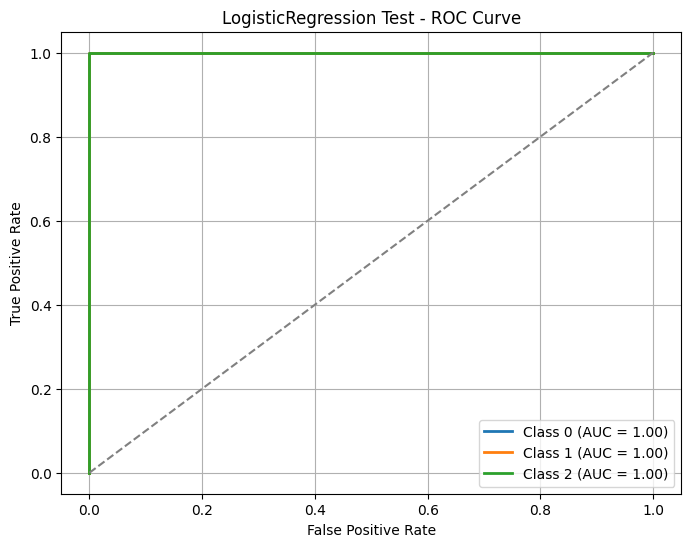

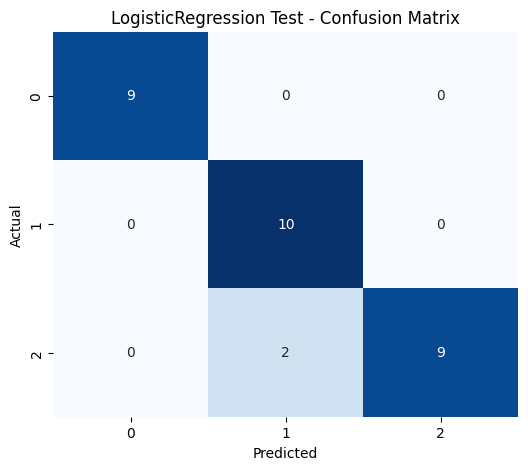




=== KNeighborsClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, AUC: 1.0000


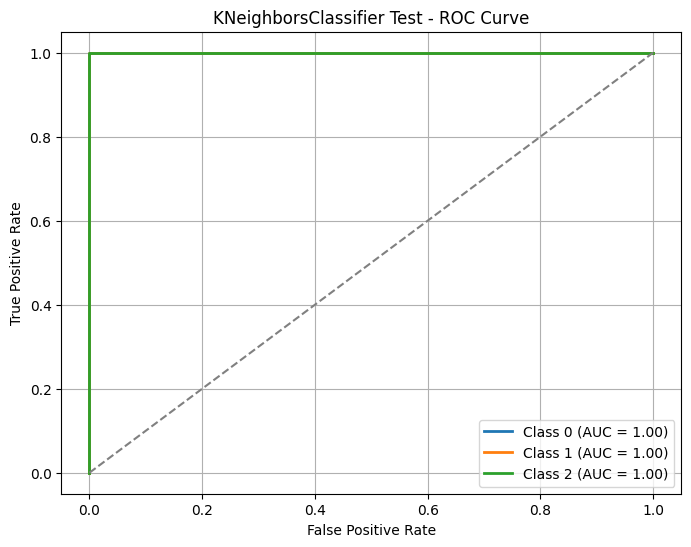

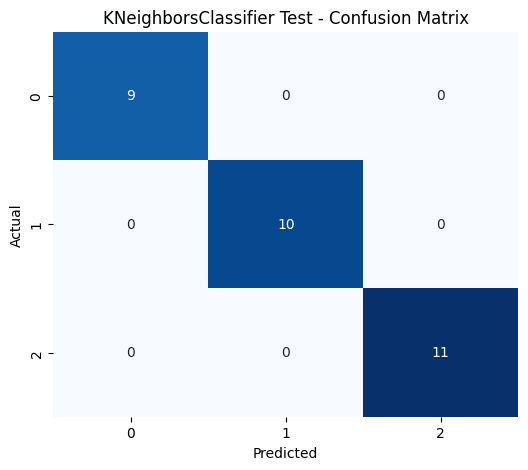




=== DecisionTreeClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1: 0.9330, AUC: 0.9500


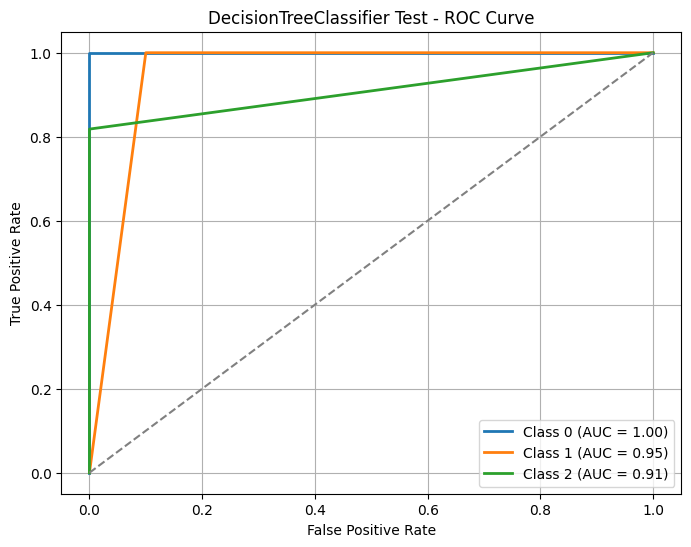

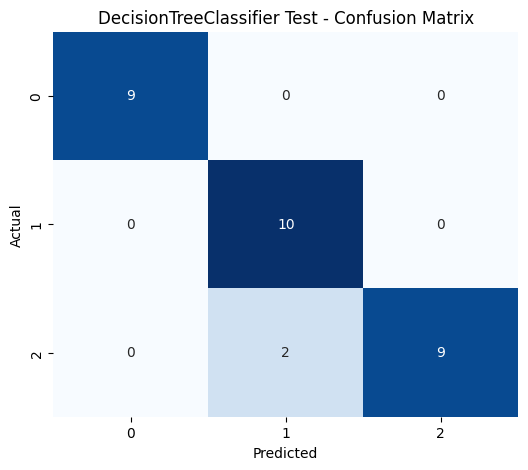




=== RandomForestClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1: 0.9330, AUC: 1.0000


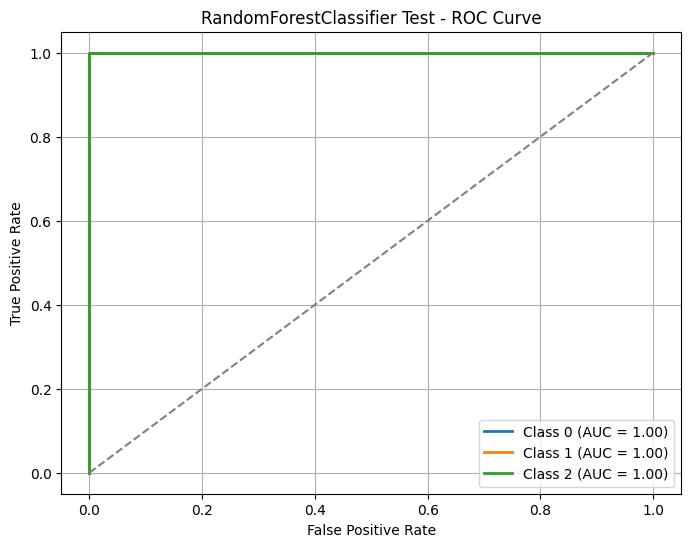

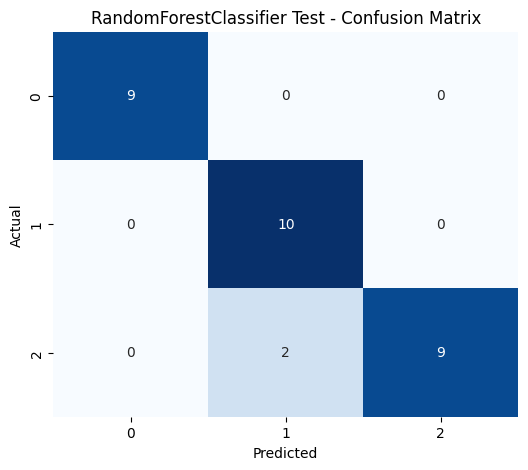




=== SVC Test: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1: 0.9330, AUC: 1.0000


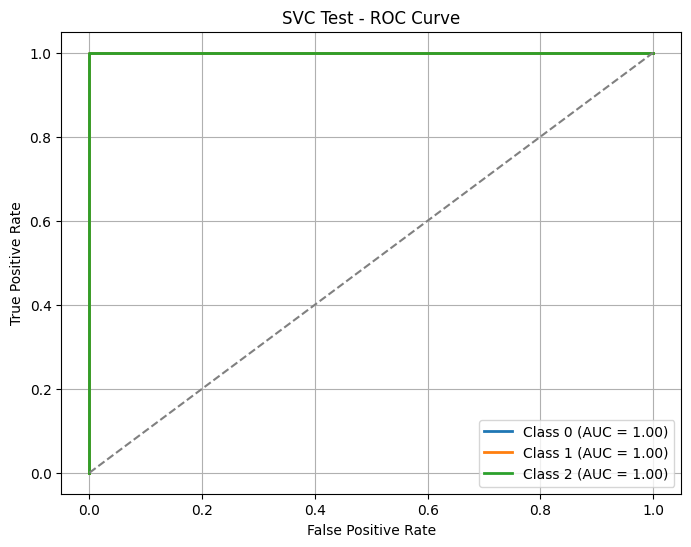

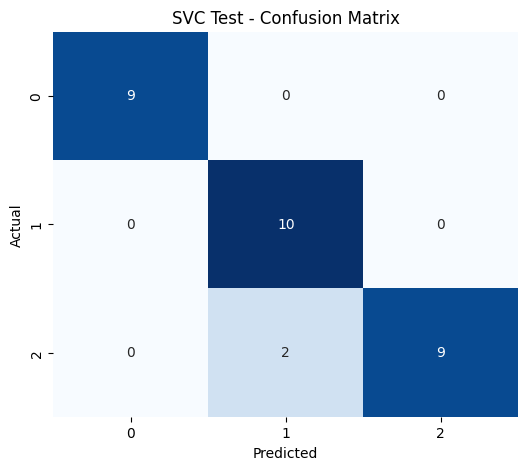

In [51]:
for name, model in models_cla.items():
    model.fit(X_train_cla, y_train_cla)
    
    y_test_pred_cla = model.predict(X_test_cla)
    y_test_proba_cla = model.predict_proba(X_test_cla)
    test_metrics_cla = print_and_log_classification_metrics(name, y_test_cla, y_test_pred_cla, y_test_proba_cla, test_metrics_cla, train_or_test='Test')

### Test metrics

In [52]:
test_metrics_cla[["Model", "Accuracy", "Precision","Recall","F1 Score","ROC AUC","Confusion Matrix"]]

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
0,LogisticRegression,0.933333,0.944444,0.933333,0.93303,1.00,"[[9, 0, 0], [0, 10, 0], [0, 2, 9]]"
1,KNeighborsClassifier,1.000000,1.000000,1.000000,1.00000,1.00,"[[9, 0, 0], [0, 10, 0], [0, 0, 11]]"
2,DecisionTreeClassifier,0.933333,0.944444,0.933333,0.93303,0.95,"[[9, 0, 0], [0, 10, 0], [0, 2, 9]]"
3,RandomForestClassifier,0.933333,0.944444,0.933333,0.93303,1.00,"[[9, 0, 0], [0, 10, 0], [0, 2, 9]]"
4,SVC,0.933333,0.944444,0.933333,0.93303,1.00,"[[9, 0, 0], [0, 10, 0], [0, 2, 9]]"
